In [30]:
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
df = pd.read_csv("shop_data.csv")
df.head(15)
#gtin - product id
#prid - inn бренда
#inn - inn магазина


,dt,gtin,prid,inn,id_sp_,type_operation,price,cnt
0,2022-04-02,0E6D952FEFCA3542FF2E4EB72E544D6E,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,85500,1
1,2022-04-02,18AA2603B271C19A581133BD34319311,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,83571,1
2,2022-04-02,807F8E2BBA75FA9FDD7E48689C17B03C,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,14285,2
3,2022-04-02,3DA4C09BB1526430F6584E8FA94C5723,CE816FDF82B121C67CAE9B79203B8BA1,6B8E111AB5B5C556C0AEA292ACA4D88B,DB144114FDED5796EC868E55DA982839,Продажа конечному потребителю в точке продаж,48528,1
4,2022-04-02,C2A8785275FF723EDD3057CE98FD794E,CE816FDF82B121C67CAE9B79203B8BA1,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,60742,1
5,2022-04-02,98ACF859FC8B77C2C266E6A3D737BCC0,A43BE3249A22A8CCB7AE1F6D1B1477D0,6B8E111AB5B5C556C0AEA292ACA4D88B,2D7B907619F22FFBA608997A3057A958,Продажа конечному потребителю в точке продаж,135100,1
6,2022-04-02,68B3B11256FAEF67FDB574DBEAC6809C,6B8E111AB5B5C556C0AEA292ACA4D88B,6B8E111AB5B5C556C0AEA292ACA4D88B,7F556C7E29E4699B155836BF810F56A1,Продажа конечному потребителю в точке продаж,80000,1
7,2022-04-02,FFB6DEA98A6FB0371A0B563EA85D80C4,4281359F13D5AB731E7D14BA84EB5DEC,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,99642,3
8,2022-04-02,C31498CA5661B43AE5AFDA43BE768CB6,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,EB5889D7342D144934672CA292AAD94F,Продажа конечному потребителю в точке продаж,54857,1
9,2022-04-02,5FF948C4E8EF1C50A33BAAD96E4E9C54,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,32246224A0B2950C19FAC96BC145F73F,Продажа конечному потребителю в точке продаж,12885,1


#### Анализ данных

In [32]:
df["price"]=df["price"]/100

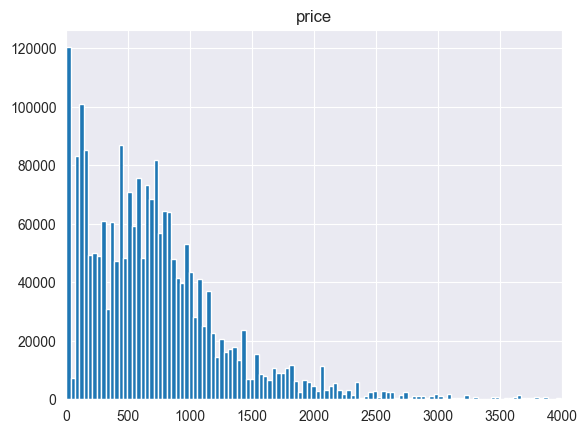

In [33]:

df.hist(column="price", bins=500,)
plt.xlim(xmin=0, xmax=4000)
plt.show()

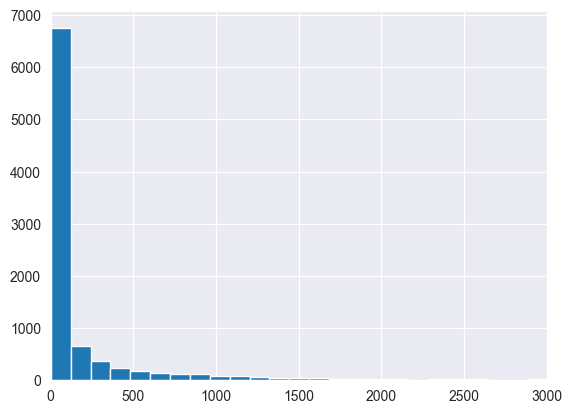

In [34]:
plt.hist(df.gtin.value_counts(), bins=100)
plt.xlim(xmin=0, xmax=3000)

plt.show()

#### Посмотрим, какие именно товары продаются чаще всего:

In [35]:
df.gtin.value_counts()

0F40E9DE2E7DBC0DA161448D98D47C69    12015
1AF3D5B9E053CBDF908FB967FE3543AA     9172
1A98A1EB588F10773B00201735CB4991     8646
8B76211744D54CE6EB125BE8611B29A7     8059
016B9003937AE83CA305958CEBA36FEF     7590
                                    ...  
2A5E5BA74EAB5B114BD03CD8E4034477        1
58DE3C54FF31A869F01D9660F1F30041        1
41DA75EAC5C4E94E842F6D39860EF386        1
0A4F152D498DCB012ECC5D8B1CB7FDA6        1
D63CBDDD94A5916AD9390E47D2C17C6C        1
Name: gtin, Length: 9269, dtype: int64

In [36]:
df[df.gtin=='0F40E9DE2E7DBC0DA161448D98D47C69']

,dt,gtin,prid,inn,id_sp_,type_operation,price,cnt
14,2022-04-02,0F40E9DE2E7DBC0DA161448D98D47C69,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,91F389DD8A8DC65C2281DA8BC9AAC534,Продажа конечному потребителю в точке продаж,135.71,4
176,2022-03-03,0F40E9DE2E7DBC0DA161448D98D47C69,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,116.42,2
217,2022-03-03,0F40E9DE2E7DBC0DA161448D98D47C69,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,91F389DD8A8DC65C2281DA8BC9AAC534,Продажа конечному потребителю в точке продаж,79.71,1
818,2021-12-21,0F40E9DE2E7DBC0DA161448D98D47C69,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,56F2281593FEC0DF77C725B3DBC37B81,Продажа конечному потребителю в точке продаж,85.57,1
1399,2022-10-12,0F40E9DE2E7DBC0DA161448D98D47C69,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,BF2645DD7557592CB4A2C0717A5AB41D,Продажа конечному потребителю в точке продаж,128.85,1
...,...,...,...,...,...,...,...,...
2262462,2022-11-21,0F40E9DE2E7DBC0DA161448D98D47C69,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,1183DF9129D0483FBDBB799B05C5C253,Продажа конечному потребителю в точке продаж,85.57,1
2262495,2022-11-21,0F40E9DE2E7DBC0DA161448D98D47C69,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,C2D3627B8D4393E053DC7CEC86ECFE4F,Продажа конечному потребителю в точке продаж,85.57,1
2262606,2022-11-21,0F40E9DE2E7DBC0DA161448D98D47C69,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,6FB6F3CD69FA12DE5FFF80AC6DB1E06F,Продажа конечному потребителю в точке продаж,85.57,1
2262614,2022-11-21,0F40E9DE2E7DBC0DA161448D98D47C69,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,0E0AB566F850DC258ABBBE04A200270F,Продажа конечному потребителю в точке продаж,85.57,1


In [37]:
df.type_operation.value_counts()

Продажа конечному потребителю в точке продаж    2135724
Дистанционная продажа конечному потребителю      109805
Прочий тип вывода из оборота                      16588
Списание / Вывод из оборота без получателя          361
Конечная продажа организации                        320
Продажи за пределы РФ                                97
Name: type_operation, dtype: int64

In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['type_oper_int'] = le.fit_transform(df['type_operation'])


In [39]:
df.dt = pd.to_datetime(df.dt)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2262895 entries, 0 to 2262894
Data columns (total 9 columns):
 #   Column          Dtype         
---  ------          -----         
 0   dt              datetime64[ns]
 1   gtin            object        
 2   prid            object        
 3   inn             object        
 4   id_sp_          object        
 5   type_operation  object        
 6   price           float64       
 7   cnt             int64         
 8   type_oper_int   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(5)
memory usage: 146.7+ MB


Добавим к датасету дополнительную информацию о курсах евро и доллара в тот день, когда производилась транзакция

In [40]:
df_euro = pd.read_csv("rateEUR.csv", delimiter=';', parse_dates=['Date'])
df_usd = pd.read_csv("rateUSD.csv", delimiter=';', parse_dates=['Date'])
df_euro["EUR"] = df_euro["EUR"].str.replace(",", ".").astype(float).astype(int)
df_usd["USD"] = df_usd["USD"].str.replace(",", ".").astype(float).astype(int)
df_euro.info()
df_usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    246 non-null    datetime64[ns]
 1   EUR     246 non-null    int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 3.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    246 non-null    datetime64[ns]
 1   USD     246 non-null    int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 3.0 KB


In [41]:
df.rename(columns={"dt": "Date"}, inplace=True)

In [42]:
df = pd.merge(df, df_euro, on='Date', how='left')
df = pd.merge(df, df_usd, on='Date', how='left')

Также добавим информацию о том, какая была медианная зарплата в день транзакции.

In [43]:
df_median_wages = pd.read_csv("median-wages.csv", delimiter=';', parse_dates=['Дата'], encoding="Windows-1251")
df_median_wages.rename(columns={"Дата": "Date", "Значение": "Median_wage"}, inplace=True)
df_median_wages = df_median_wages[df_median_wages['Категории'] == 'Все отрасли']
df_median_wages.drop(columns=["Категории"], inplace=True)



In [44]:
df_median_wages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         74 non-null     datetime64[ns]
 1   Median_wage  74 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.7 KB


Построим график зависимости роста медианной зарплаты от времени

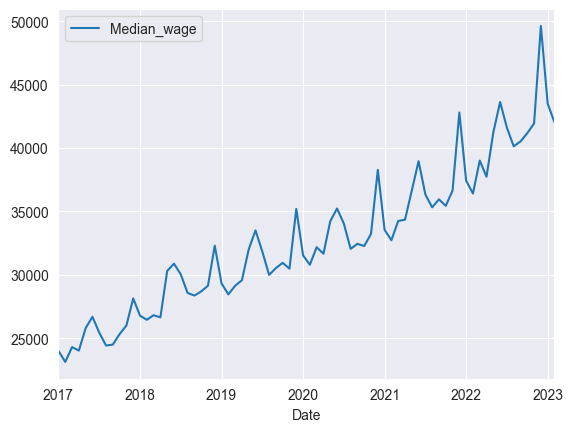

In [45]:
df_median_wages = df_median_wages.set_index("Date")
df_median_wages.plot()
plt.show()

In [47]:


# df_median_wages["Date"] = df_median_wages["Date"].to_period('M')
# df_median_wages.set_index('Date')
df_median_wages.index = df_median_wages.index.to_period('M')

def get_median_wage(period):
    return df_median_wages.loc[period, 'Median_wage']

In [48]:
df_median_wages

,Median_wage
Date,
2017-01,24012
2017-02,23142
2017-03,24308
2017-04,24035
2017-05,25803
...,...
2022-10,41177
2022-11,41937
2022-12,49627


In [49]:

df["Median_wage"] = df["Date"].dt.to_period('M').apply(get_median_wage)
df.head(50)


,Date,gtin,prid,inn,id_sp_,type_operation,price,cnt,type_oper_int,EUR,USD,Median_wage
0,2022-04-02,0E6D952FEFCA3542FF2E4EB72E544D6E,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,855.00,1,2,NaN,NaN,37739
1,2022-04-02,18AA2603B271C19A581133BD34319311,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,835.71,1,2,NaN,NaN,37739
2,2022-04-02,807F8E2BBA75FA9FDD7E48689C17B03C,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,142.85,2,2,NaN,NaN,37739
3,2022-04-02,3DA4C09BB1526430F6584E8FA94C5723,CE816FDF82B121C67CAE9B79203B8BA1,6B8E111AB5B5C556C0AEA292ACA4D88B,DB144114FDED5796EC868E55DA982839,Продажа конечному потребителю в точке продаж,485.28,1,2,NaN,NaN,37739
4,2022-04-02,C2A8785275FF723EDD3057CE98FD794E,CE816FDF82B121C67CAE9B79203B8BA1,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,607.42,1,2,NaN,NaN,37739
5,2022-04-02,98ACF859FC8B77C2C266E6A3D737BCC0,A43BE3249A22A8CCB7AE1F6D1B1477D0,6B8E111AB5B5C556C0AEA292ACA4D88B,2D7B907619F22FFBA608997A3057A958,Продажа конечному потребителю в точке продаж,1351.00,1,2,NaN,NaN,37739
6,2022-04-02,68B3B11256FAEF67FDB574DBEAC6809C,6B8E111AB5B5C556C0AEA292ACA4D88B,6B8E111AB5B5C556C0AEA292ACA4D88B,7F556C7E29E4699B155836BF810F56A1,Продажа конечному потребителю в точке продаж,800.00,1,2,NaN,NaN,37739
7,2022-04-02,FFB6DEA98A6FB0371A0B563EA85D80C4,4281359F13D5AB731E7D14BA84EB5DEC,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,996.42,3,2,NaN,NaN,37739
8,2022-04-02,C31498CA5661B43AE5AFDA43BE768CB6,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,EB5889D7342D144934672CA292AAD94F,Продажа конечному потребителю в точке продаж,548.57,1,2,NaN,NaN,37739
9,2022-04-02,5FF948C4E8EF1C50A33BAAD96E4E9C54,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,32246224A0B2950C19FAC96BC145F73F,Продажа конечному потребителю в точке продаж,128.85,1,2,NaN,NaN,37739


In [50]:
df.to_csv("shop_data_modified_2.csv")